In [2]:
import IPython.core.display
import matplotlib

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("data/vgsales.csv")
# df.value.astype(int, copy=False);

In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.Developer.count()

10096

In [6]:
df.Name.isnull()
df = df[df['Name'].notna()]

In [7]:
df.User_Score.isnull().sum()

6702

In [8]:
#non-numeric value convert to NaN
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')
df['Rating'] = df['Rating'].apply(pd.to_numeric, errors='coerce')

In [9]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating             float64
dtype: object

In [10]:
df[['Publisher', 'Developer']]=df[['Publisher', 'Developer']].fillna(value='missing')

In [11]:
# df['Rating'] = df['Rating'].astype('Int64')


In [12]:
df[['Critic_Count', 'Critic_Score', 'User_Count']] = df[['Critic_Count', 'Critic_Score', 'User_Count']].astype('Int64')

In [13]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         Int64
Critic_Count         Int64
User_Score         float64
User_Count           Int64
Developer           object
Rating             float64
dtype: object

In [14]:
#object to Category
df['Genre']= df['Genre'].astype('category')
genres = df.Genre.cat.categories
print(genres)

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')


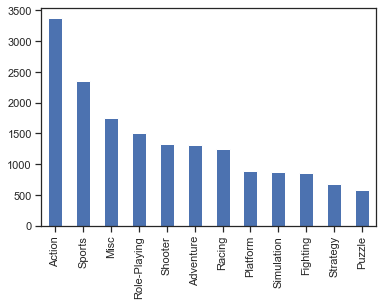

In [15]:
df['Genre'].value_counts().plot(kind='bar')

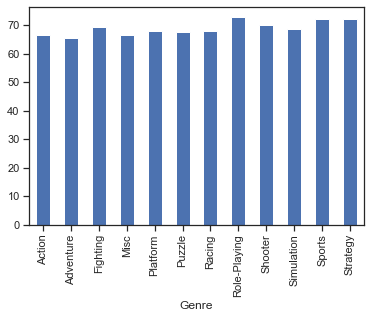

In [16]:
df.groupby('Genre')['Critic_Score'].mean().plot(kind='bar')
#plot by score
#in terms of rating from critic and users there is not that much of a difference
#role playing games has slightly hier ratings from both critics and users;


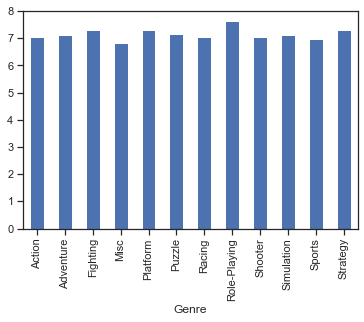

In [17]:
df.groupby('Genre')['User_Score'].mean().plot(kind='bar')

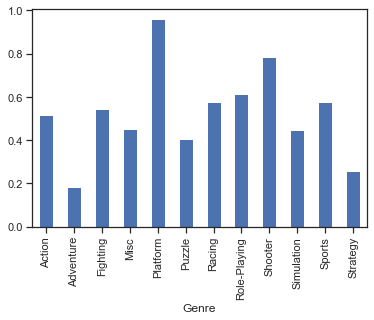

In [18]:
df.groupby('Genre')['Global_Sales'].mean().plot(kind='bar')
#plot by sale
#platform game significantly has a higher sale

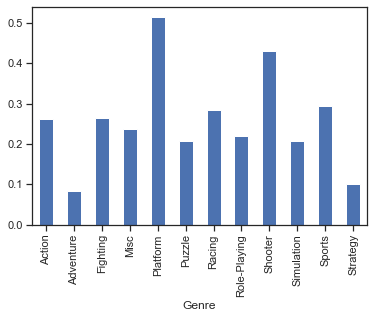

In [19]:
df.groupby('Genre')['NA_Sales'].mean().plot(kind='bar')

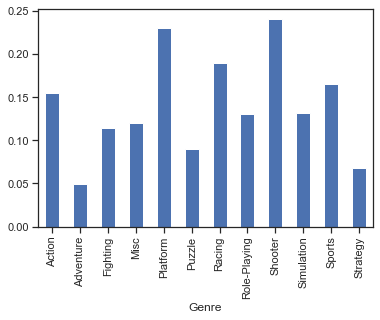

In [20]:
df.groupby('Genre')['EU_Sales'].mean().plot(kind='bar')
#this is not the case for EU, it is shooter with highest sale and Platform games just a bit lower

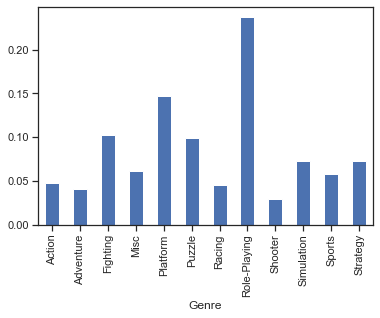

In [21]:
df.groupby('Genre')['JP_Sales'].mean().plot(kind='bar')
#in Japan Role-Playing games significantly has a higher sale

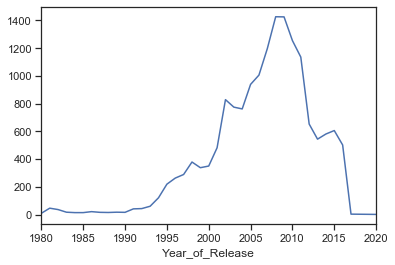

In [22]:
df.groupby('Year_of_Release')['Platform'].count().plot()

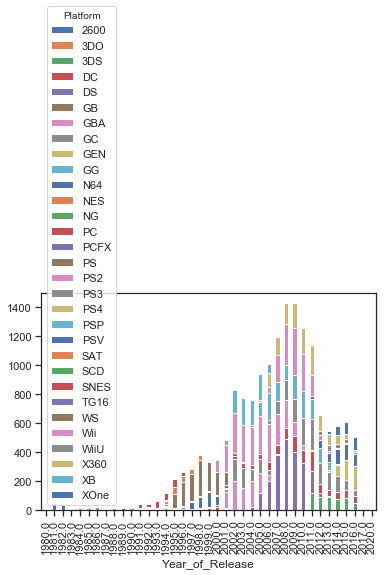

In [40]:
# df.groupby('Year_of_Release','Platform').sum().plot()
df_year_platf = df.groupby('Year_of_Release').Platform.value_counts()
df_year_platf.unstack().plot(kind='bar', stacked=True)
plt.show()

40


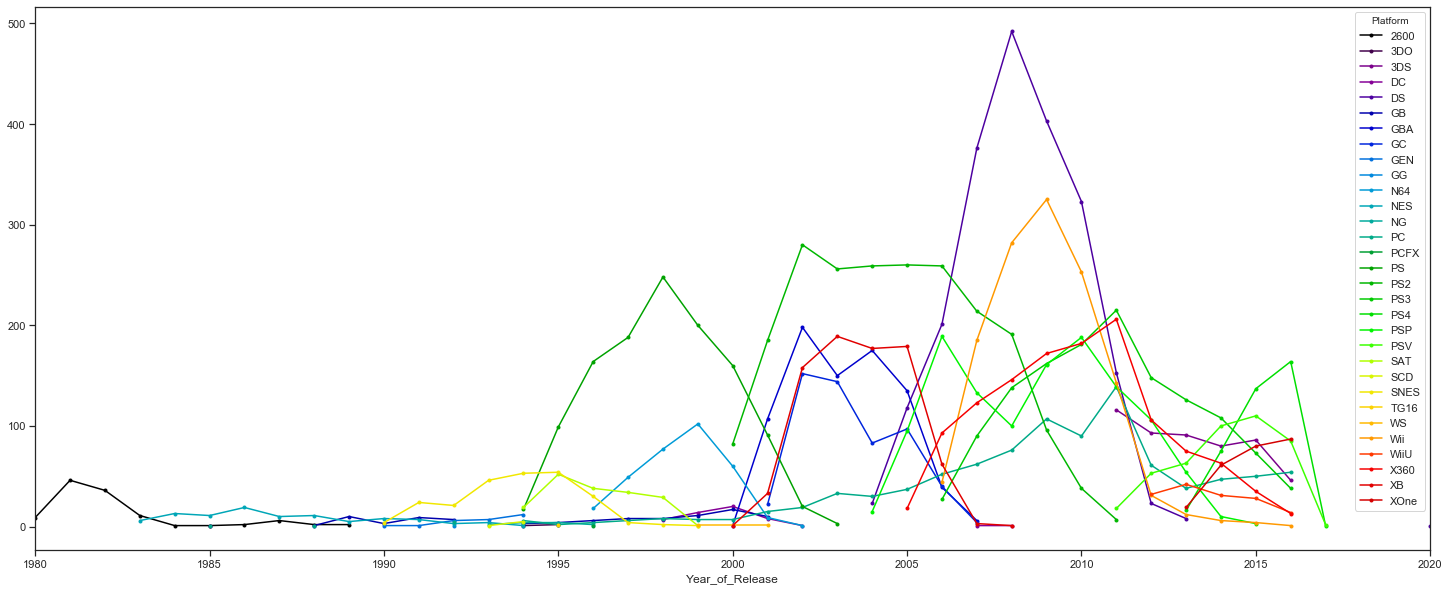

In [92]:
number_of_plots = len(df.Year_of_Release.unique())
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 1.2,number_of_plots)]
# ax1.set_color_cycle(colors)
df_year_platf.unstack().plot(kind='line',style='.-',figsize=(25,10), stacked=False,color = colors)
plt.show()

In [73]:
ax = sns.lineplot(hue="region", style="event", data=df_year_platf)

ValueError: MultiIndex has no single backing array. Use 'MultiIndex.to_numpy()' to get a NumPy array of tuples.

In [24]:
df.Year_of_Release.value_counts()
# df.shape

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [25]:
df.groupby('Year_of_Release')['Platform'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [26]:
df.loc[0]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales               NaN
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                  8
User_Count                322
Developer            Nintendo
Rating                    NaN
Name: 0, dtype: object

In [27]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,16448.000000,15847.000000,15519.000000,16717.000000,15339.000000,15727.000000,8137.000000,8137.000000,7590.000000,7590.000000,0.0
mean,2006.488996,0.263483,0.146219,0.077610,0.046821,0.531530,68.967679,26.360821,7.125046,162.229908,NaN
std,5.877470,0.822059,0.513339,0.308836,0.175132,1.539641,13.938165,18.980495,1.500006,561.282326,NaN
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000,NaN
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000,NaN
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000,NaN
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000,NaN
